# SQL

## MANIPULAR DADOS NULL

### IS NULL

In [ ]:
USE Northwind;

SELECT
	EmployeeID,
	LastName,
	Title,
	City,
	Region
FROM employees
WHERE Region IS NULL;

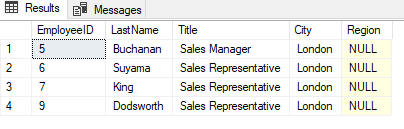

### IS NOT NULL

In [ ]:
USE Northwind;

SELECT
	EmployeeID,
	LastName,
	Title,
	City,
	Region
FROM employees
WHERE Region IS NOT NULL;

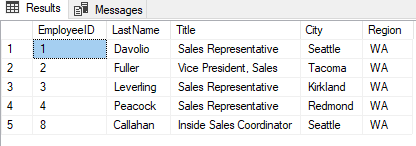

### NULLS FIRST e NULLS LAST

In [ ]:
SELECT * FROM departments;

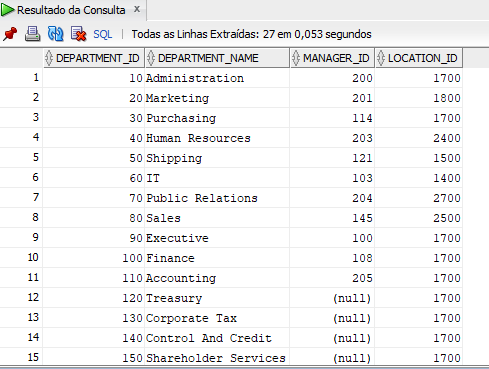

**NULLS FIRST - Oracle Database**

In [ ]:
SELECT * FROM departments
ORDER BY manager_id NULLS FIRST; 

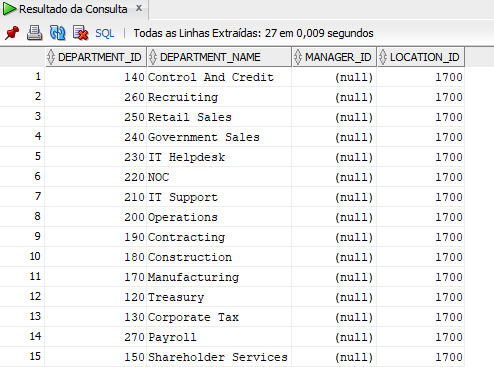

**NULLS LAST - PostreSQL**

In [ ]:
-- Northwind database
SELECT
	employee_id,
	last_name,address
	title,address
	city,
	region
FROM employees
ORDER BY region NULLS LAST; 

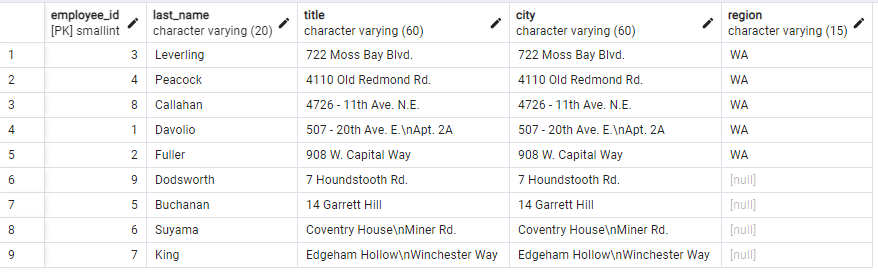

As clásulas `NULLS FIRST` e `NULLS LAST` estão presentes apenas em PL/PGsql e PL/SQL, para termos o mesmo resultado do código anterior em T-SQL, MySQL e SQL PL (IBM DB2):

In [ ]:
USE Northwind;

SELECT * 
FROM employees
ORDER BY
	CASE
		WHEN region IS NULL THEN 1
		ELSE 0
	END,
	region;

### FUNÇÃO NVL

A função `COALESCE` é específica do PL/SQL (Oracle Database).

In [ ]:
SELECT
    first_name,
    commission_pct
FROM employees
FETCH FIRST 10 ROWS ONLY;

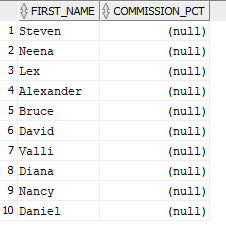

In [ ]:
SELECT
    first_name,
    commission_pct,
    NVL(commission_pct, 0)
FROM employees
FETCH FIRST 10 ROWS ONLY;

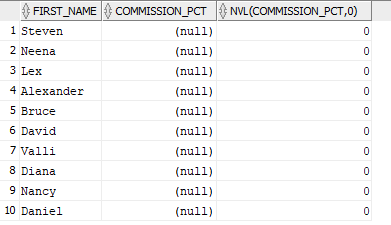

Para obter o mesmo resultado acima em T-SQL, MySQL e PL/pgSQL, podemos usar a função `COALESCE`:

In [ ]:
-- northwind database
SELECT
    employee_id,
    last_name,
    title,
    city,
	-- Replace NULLL to *
    COALESCE(region, '*') AS region
FROM employees;

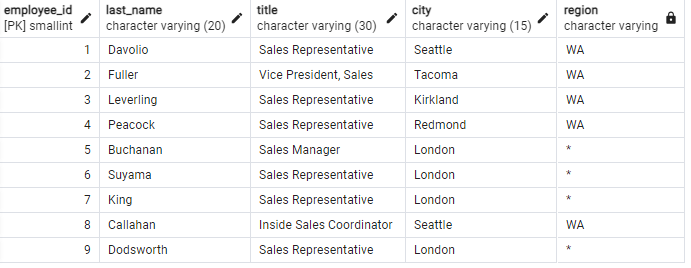

### FUNÇÃO NVL2
A função **`NLV2`** no Oracle Database é uma função de manipulação de dados que permite substituir valores `NULL` por um valor alternativo, de maneira semelhante à função `NVL`, mas com uma sintaxe ligeiramente diferente e algumas funcionalidades adicionais. A função **`NLV2`** retorna um de dois valores baseados em se a expressão fornecida é `NULL` ou não.

No código a seguir, mostramos como substituir valores NULL por 0 e valores diferentes de NULL serão acrescidos com 0.01, ou seja, quem não recebe comissão dos lucros da empresa continuará sem receber, porém, que recebe passará a receber 1% a mais.

In [ ]:
SELECT
    first_name,
    commission_pct,
    NVL2(commission_pct, commission_pct + 0.01, 0)
FROM employees;

O código acima em T-SQL, MySQL e PL/pgSQL seria:

In [ ]:
SELECT
    first_name,
    commission_pct,
    (CASE
        WHEN commission_pct IS NULL THEN 0
        ELSE commission_pct + 0.01
    END) AS test
FROM employees;

### NULLIF
A função **`NULLIF`** no Oracle Database é utilizada para comparar duas expressões e retornar `NULL` se elas forem iguais; caso contrário, retorna a primeira expressão. Essa função é útil para evitar valores repetidos ou para lidar com situações onde um determinado valor deve ser tratado como `NULL`.

**Considerações**

- **Simplicidade**: **`NULLIF`** é simples e direto para casos específicos onde uma comparação direta pode resolver o problema.
- **Legibilidade**: Torna o código mais legível quando se lida com valores específicos que devem ser tratados como `NULL`.
- 
Em resumo, a função **`NULLIF`** é uma ferramenta útil para simplificar a lógica de comparação e substituição de valores em consultas SQL, tornando o tratamento de dados mais eficiente e o código mais legível.

O exemplo abaixo mostra o uso da função **`NULLIF`** para filtrar pedidos que foram feitos e enviadas na mesma data.

In [ ]:
SELECT
    order_id,
    order_date,
    NULLIF(order_date, shipped_date) AS shipped_date,
    ship_name
FROM orders
WHERE shipped_date IS NULL;